In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [2]:
iris = load_iris()

X = iris.data[:, (2,3)] # petal length and petal width
y = (iris.target == 0).astype(np.int) # iris setosa?

per_clf = Perceptron()
per_clf.fit(X,y)

y_pred = per_clf.predict([[2, .5]])

In [3]:
y_pred

array([0])

### Tensor Flow

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
tf.__version__


'2.4.1'

In [6]:
keras.__version__

'2.4.0'

In [7]:
fashionmnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashionmnist.load_data()

In [8]:
X_train_full.shape

(60000, 28, 28)

In [9]:
X_train_full.dtype

dtype('uint8')

In [10]:
X_validate, X_train = X_train_full[:5000] / 255, X_train_full[5000:] / 255
y_validate, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255

In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'AnkleBoot']
class_names[y_train[0]]

'Coat'

In [12]:
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28,28]))

model.add(keras.layers.Dense(300, activation='relu'))

model.add(keras.layers.Dense(100, activation='relu'))

model.add(keras.layers.Dense(10, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.layers

In [15]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [16]:
model.get_layer('dense') is hidden1

True

In [17]:
weights, biases = hidden1.get_weights()
weights

array([[-0.0246636 , -0.07073776,  0.0379915 , ...,  0.00981106,
         0.04358961, -0.0068099 ],
       [ 0.00038612, -0.07311007,  0.03066667, ...,  0.00941885,
         0.01498359,  0.03999966],
       [-0.03574593,  0.01598416, -0.0529095 , ...,  0.07168227,
         0.01779995,  0.01896974],
       ...,
       [-0.05288085,  0.00777777, -0.05029333, ...,  0.01615399,
        -0.00552492, -0.07313475],
       [-0.04579484,  0.04477668,  0.03775553, ...,  0.05974139,
        -0.0379805 ,  0.03593572],
       [ 0.07108818,  0.01124566,  0.06554882, ..., -0.03799566,
         0.06237333,  0.02610945]], dtype=float32)

In [18]:
weights.shape

(784, 300)

In [19]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [20]:
biases.shape

(300,)

In [21]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer = 'sgd',
             metrics = ['accuracy'])

In [22]:
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_validate, y_validate))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.9677 - accuracy: 0.6933 - val_loss: 0.5029 - val_accuracy: 0.8282
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5042 - accuracy: 0.8265 - val_loss: 0.4360 - val_accuracy: 0.8534
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4534 - accuracy: 0.8407 - val_loss: 0.4355 - val_accuracy: 0.8464
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4188 - accuracy: 0.8523 - val_loss: 0.4000 - val_accuracy: 0.8680
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4049 - accuracy: 0.8579 - val_loss: 0.4203 - val_accuracy: 0.8482
Epoch 6/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.3773 - accuracy: 0.8677 - val_loss: 0.3829 - val_accuracy: 0.8684
Epoch 7/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.3678 - accuracy: 0.8681 - val_loss: 0.3627 - val_accuracy:

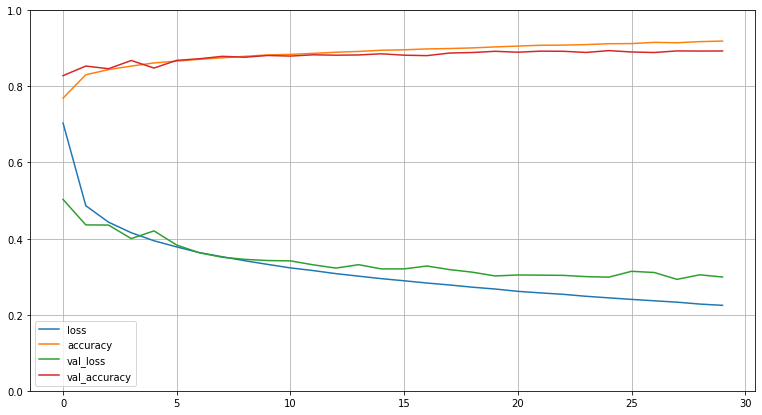

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(13,7))
plt.grid(True)
plt.gca().set_ylim(0,1) #setting the vertical range to [0->1]
plt.show()

In [24]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 660us/step - loss: 0.3314 - accuracy: 0.8821


[0.3313761353492737, 0.882099986076355]

In [25]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [26]:
y_pred = model.predict_classes(X_new)
y_pred

/usr/local/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1])

In [27]:
np.array(class_names)[y_pred]

array(['AnkleBoot', 'Pullover', 'Trouser'], dtype='<U11')

In [28]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)